<a href="https://colab.research.google.com/github/sp-au-mu-nl/PythonMedia/blob/main/chap01/chap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://www.slp.k.hosei.ac.jp/~itou/book/2018/PythonMedia/files/audio.zip
!unzip audio.zip
!rm audio.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import plotly.express as px
import librosa
import soundfile as sf

In [ ]:
t=np.arange(0,1,1/8000)
a=0.8
f=440
y=a*np.sin(2*np.pi*f*t)

In [ ]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(-1,2,0.5)

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5])

In [ ]:
np.info(np.sin)

sin(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric sine, element-wise.

Parameters
----------
x : array_like
    Angle, in radians (:math:`2 \pi` rad equals 360 degrees).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.
    Note that if an uninitialized `out` array is created via the default
    ``out=None``, locations within it where the condition is False will
    remain uninitialized.
**kw

In [ ]:
np.set_printoptions(precision=3)
y2=np.sin(np.arange(0,1,0.1))
y2

array([0.   , 0.1  , 0.199, 0.296, 0.389, 0.479, 0.565, 0.644, 0.717,
       0.783])

In [ ]:
IPython.display.Audio(y,rate=8000)

In [ ]:
px.line(y) # mac の場合、pad を押しながら x 軸方向に範囲を指定すると zoom される

In [ ]:
px.line(x=t,y=y, labels={'x': 'Time (s)', 'y': 'Amplitude'})

In [ ]:
y[0]

0.0

In [ ]:
y[-1]

-0.2709903361959531

In [ ]:
y

array([ 0.   ,  0.271,  0.51 , ..., -0.689, -0.51 , -0.271])

In [ ]:
y.shape

(8000,)

In [ ]:
y[7999]

-0.2709903361959531

In [ ]:
y[0:10]

array([0.   , 0.271, 0.51 , 0.689, 0.786, 0.79 , 0.701, 0.529, 0.294,
       0.025])

In [ ]:
y[:10]

array([0.   , 0.271, 0.51 , 0.689, 0.786, 0.79 , 0.701, 0.529, 0.294,
       0.025])

In [ ]:
y[-10:]

array([ 0.247, -0.025, -0.294, -0.529, -0.701, -0.79 , -0.786, -0.689,
       -0.51 , -0.271])

In [ ]:
y[-10:-1]

array([ 0.247, -0.025, -0.294, -0.529, -0.701, -0.79 , -0.786, -0.689,
       -0.51 ])

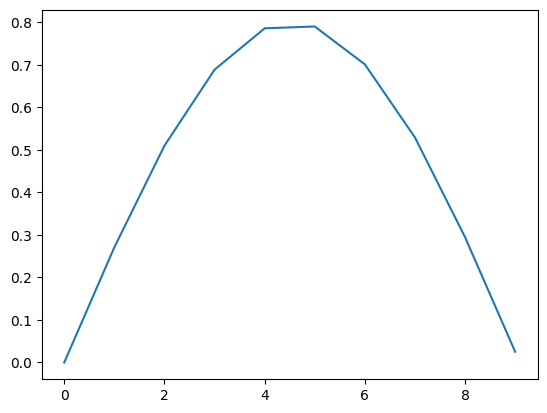

In [ ]:
plt.plot(y[0:10])

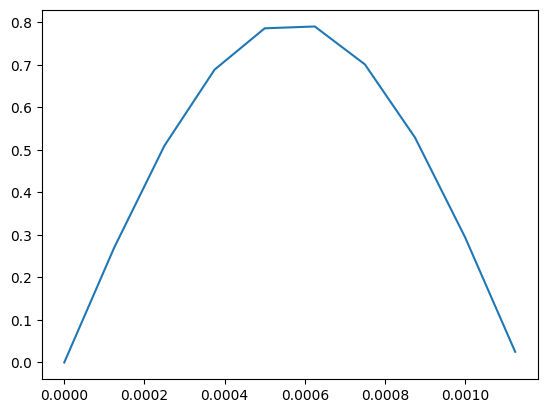

In [ ]:
r = np.arange(10)
plt.plot(t[r],y[r])

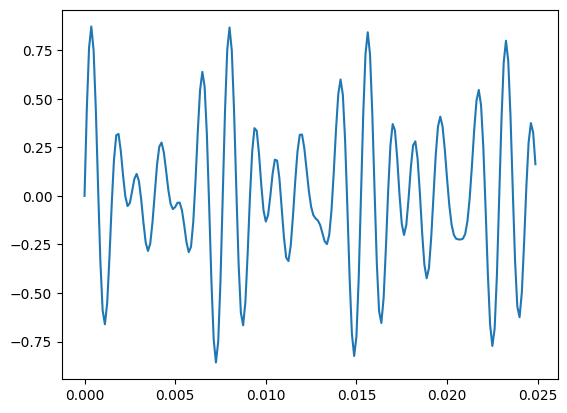

In [ ]:
fs=8000
t=np.arange(0,1,1/fs)
a=0.3
y523=a*np.sin(2*np.pi*523*t)
y660=a*np.sin(2*np.pi*660*t)
y784=a*np.sin(2*np.pi*784*t)
yy=y523+y660+y784
IPython.display.display(IPython.display.Audio(yy,rate=fs,autoplay=True))
r=np.arange(200)
plt.plot(t[r],yy[r])

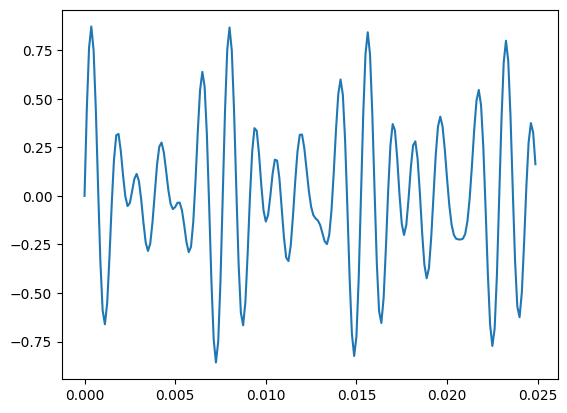

In [ ]:
exec(open('./add3waves.py').read())

In [ ]:
a=0.4
y438=a*np.sin(2*np.pi*438*t)
y442=a*np.sin(2*np.pi*442*t)
IPython.display.Audio(y438+y442,rate=fs)

In [ ]:
ayy=2*a
f1=442
f2=438
fb=(f1-f2)/2
fa=(f1+f2)/2

In [ ]:
yy=ayy*np.cos(2*np.pi*fb*t)*np.sin(2*np.pi*fa*t)
IPython.display.Audio(yy,rate=fs)

In [ ]:
x=np.arange(1,4)
x

array([1, 2, 3])

In [ ]:
y=np.arange(4,7)
y

array([4, 5, 6])

In [ ]:
x*y

array([ 4, 10, 18])

In [ ]:
v1=np.arange(0,3)
v2=np.arange(3,5)
v3=np.arange(5,9)
v=np.hstack((v1,v2,v3))
v

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
IPython.display.Audio(np.hstack((y523,y660)),rate=fs)

In [ ]:
v,fs=librosa.load('vibra8.wav',sr=None)

In [ ]:
t=np.arange(0,1,1/fs)
f=440
a=0.1
ysin=a*np.sin(2*np.pi*f*t)
vmix=v+ysin

ValueError: operands could not be broadcast together with shapes (26000,) (8000,) 

In [ ]:
v.shape

(26000,)

In [ ]:
ysin.shape

(8000,)

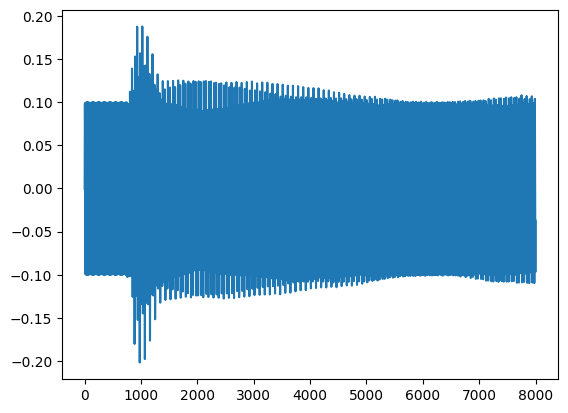

In [ ]:
vmix=v[7000:15000]+ysin
plt.plot(vmix)
IPython.display.Audio(vmix,rate=fs)

In [ ]:
sf.write('mixed.wav',vmix,fs)

In [ ]:
fs=8000
t=np.arange(0,1,1/fs)
y=2*np.sin(2*np.pi*440*t)

In [ ]:
ymax=np.max(np.abs(y))
y=y/(ymax*1.01)
sf.write('test.wav',y,fs)

In [ ]:
do=np.sin(2*np.pi*262*np.arange(0,0.75,1/fs))
re=np.sin(2*np.pi*294*np.arange(0,0.25,1/fs))
pau=np.zeros((np.int16(0.25*fs),))
mi=np.sin(2*np.pi*330*np.arange(0,0.75,1/fs))
y=np.hstack((do,re,pau,mi))
IPython.display.Audio(y,rate=fs)